# **Jour 42 : Startups dans le Marketing**

La base de données utilisée dans ce cas pratique renseigne sur quelques variables de l'activité économique de 50 Startups béninoises. Il s'agit des dépenses en Recherche et développement, Administration, Marketing, la ville de résidence et le profit généré.

## 0. Chargement des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

## 1. Importation de la base de données et vérification des valeurs manquantes

### 1.1. Importation de la base de données

In [2]:
import pandas as pd
df = pd.read_csv("../data/50_Startups_Multiple.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,Cotonou,192261.83
1,162597.70,151377.59,443898.53,Ouidah,191792.06
2,153441.51,101145.55,407934.54,Parakou,191050.39
3,144372.41,118671.85,383199.62,Cotonou,182901.99
4,142107.34,91391.77,366168.42,Parakou,166187.94


### 1.2. Vérification des valeurs manquantes 

In [3]:
print(df.isnull().sum())  

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


La base de données ne contient aucune valeur manquante.

## 2. Traitement des variables catégorielles

### 2.1. Visualisation de la variable State

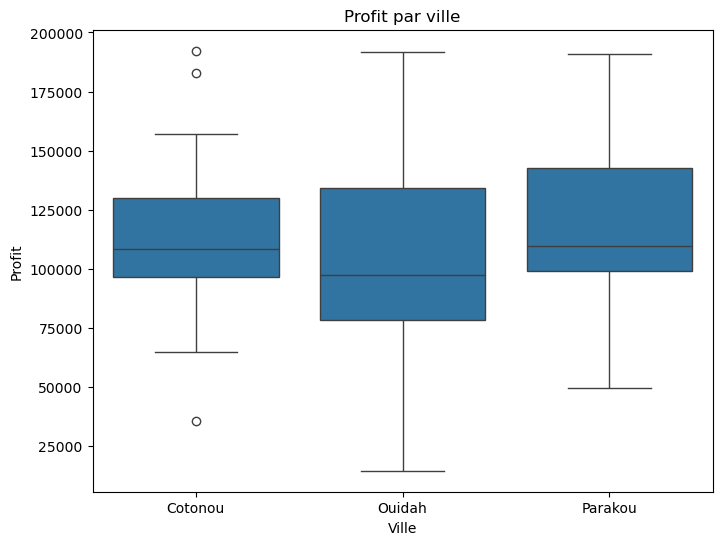

In [5]:
# Boxplot de Profit par ville
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['State'], y=df['Profit'])
plt.title('Profit par ville')
plt.xlabel('Ville')
plt.ylabel('Profit')
plt.show()

La distribution des profits des entreprises étudiées à Cotonou, présente des valeurs aberrantes.

### 2.2. Encodage de la variable catégorielle

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder = LabelEncoder()

X[:,3] = labelEncoder.fit_transform(X[:,3])

ct = ColumnTransformer([("auto", OneHotEncoder(), [-1])], remainder = 'passthrough')
X = ct.fit_transform(X)

## 3. Division du dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## 4. Construction du modèle

In [8]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
regressor = LinearRegression().fit(X_train, y_train)
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [-1.64602649e+03  2.17532903e+03 -5.29302538e+02  8.26989976e-01
 -5.47084490e-02  2.05751030e-02]
Intercept: 53491.98107666568


Les coefficients représentent l'impact de chaque variable indépendante  sur la variable dépendante (ici le profit). 
L'intercept représente la valeur prédite du profit lorsque toutes les variables indépendantes sont égales à zéro. Dans notre cas, si toutes les dépenses (R&D, Administration, Marketing) sont nulles et que la ville n'est pas spécifiée, le profit prédit serait d'environ 53 491,98. Aussi, bien qu'il semble être contre-intuitif, chaque franc CFA supplémentaire en R&D ferait baisser le profit de 1 646 FCFA, toutes choses égales par ailleurs. Le marketing a un effet négatif sur le profit. Peut-être que certaines dépenses en marketing ne sont pas efficaces. Par contre chaque franc investi dans l'administration augmenterait le profit de 2 175 FCFA.

In [9]:
# Calcul du coefficient de détermination

y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(r2)

0.9045543891702044


Les dépenses en R&D, administration et marketing, ainsi que la ville de résidence d'une entreprise, permettent d'expliquer à 90% la variabilité du profit généré par l'entreprise.

## 5. Prédiction

On se propose de prédire le profit avec les critères suivants :
+ RD : 175000;
+ Administration : 90000;
+ Marketing : 45000;
+ State : Ouidah.

In [10]:
print(regressor.predict([[0, 1, 0, 175000, 90000, 45000]]))

[196392.67506606]


Le modèle prédit que, pour les critères donnés, le profit attendu est d'environ 196 392,68. Cela signifie que, selon les données historiques et le modèle entraîné, une entreprise avec ces caractéristiques (dépenses en R&D, administration, marketing, et située à Ouidah) devrait générer un profit proche de la valeur obtenue.